# Tutorial 2 - Data organization inside packerlabimaging

In [1]:
from IPython import display

In [2]:
import packerlabimaging as pkg

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally

imported packerlabimaging
	version: under...alpha...development



*This notebook demonstrates the basics of how data is organized inside of a trial object.*




## Importing data analysis objects
The first step to begin using the data analysis objects is to import the previously created objects. In general, it is advised to import th high-level `Experiment` object first, and then use the `.load_trial` method to load an individual `-Trial` object.


In [3]:
# import experiment obj and TwoPhotonImagingTrial object
expobj = pkg.import_obj(pkl_path='/home/pshah/Documents/code/packerlabimaging/tests/RL109_analysis.pkl')
print(expobj)
trialobj = expobj.load_trial(trialID='t-013')

|- Loaded packerlabimaging.Experiment object (date: 2020-12-19, expID: RL109)kl ... 
packerlabimaging Experiment object (last saved: Tue Feb  8 00:12:08 2022), date: 2020-12-19, expID: RL109, microscope: Bruker
file path: /home/pshah/Documents/code/packerlabimaging/tests/RL109_analysis.pkl

trials in Experiment object:
	t-005: TwoPhotonImagingTrial, pre 4ap 2p spont imaging
	t-006: TwoPhotonImagingTrial, pre 4ap 2p spont imaging
	t-013: AllOpticalTrial, pre 4ap 2p all optical

|- Loaded (RL109 t-013) TwoPhotonImagingTrial.alloptical experimental trial object, last saved: Tue Feb  8 00:12:01 2022


## paq data
The `paq` sub-module is used to retrieve and store data from the .paq file for each trial. It can be accessed by `trialobj.paq`:

In [6]:
# show all attributes saved in `trialobj.paq`
print(trialobj.paq)

packerlabimaging.processing.paq.paqData: 
	frame_times: [  139577   140252   140925 ... 11142935 11143607 11144280]
	frame_times_channame: frame_clock
	paq_path: /home/pshah/mnt/qnap/Data/2020-12-19/2020-12-19_RL109_013.paq
	paq_channels: ['frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage']
	paq_rate: 20000
	voltage: [0.0551814  0.053866   0.05616795 ... 3.4617312  3.4610734  3.4614022 ]


We can see that the 'frame_clock' paq channel was used as the primary channel for retrieving imaging frame timestamps synchronized to the paq clock. There are a number of other channels associated with this .paq file (however their data is not saved in this object to save space). Data from any of the other channels can stored directly to the `.paq` object using the `.storePaqChannel()` object method. In this case, the 'voltage' paq channel was stored in its entirety under `.paq.voltage`.

## Suite2p data

Suite2p is the primary Ca2+ imaging library that is integrated into the analysis pipeline. The dedicated `suite2p` submodule handles accessing suite2p functionality, as well as the data imported from Suite2p processing. Suite2p related data and methods are accessed using `trialobj.Suite2p`.

## Annotated Data

The AnnData library is the primary protocol that is used to store imaging data in an efficient, multi-functional format. It is created using the `anndata` sub-module and can be accessed using `trialobj.data`. By default, `trialobj.data` is a data array generated from Suite2p processed data.
For all guidance on AnnData objects, visit: https://anndata.readthedocs.io/en/latest/index.html.


The AnnData object is built around the raw Flu matrix of each `trialobj` . In keeping with AnnData conventions, the data structure is organized in *n* observations (obs) x *m* variables (var), where observations are suite2p ROIs and variables are imaging frame timepoints.


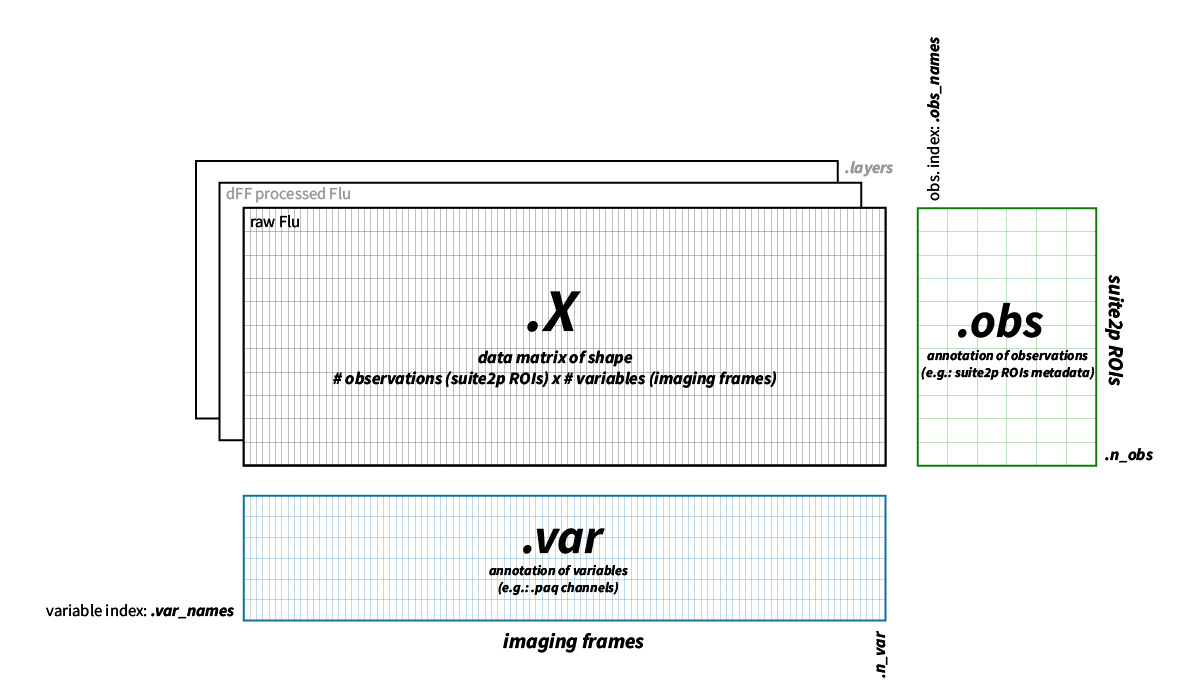

In [4]:
display.Image("/home/pshah/Documents/code/packerlabimaging/files/packerlabimaging-anndata-integration-01.jpg")

In [5]:
trialobj.data  # this is the anndata object for this trial

AnnData object with n_obs × n_vars = 640 × 16368
    obs: 'original_index', 'footprint', 'mrs', 'mrs0', 'compact', 'med', 'npix', 'radius', 'aspect_ratio', 'npix_norm', 'skew', 'std'
    var: 'frame_clock', 'x_galvo_uncaging', 'slm2packio', 'markpoints2packio', 'packio2slm', 'packio2markpoints', 'pycontrol_rsync', 'voltage', 'photostim'
    obsm: 'ypix', 'xpix'
    layers: 'dFF'

### storage of Flu data

The raw data is stored in `.X`

In [6]:
print(trialobj.data.X)

print('shape: ', trialobj.data.X.shape)

[[192.45299   242.91817   107.09003   ... 207.51477   334.1156
  365.0477   ]
 [ 66.31345   259.14606   203.12158   ... 101.82039   114.88985
   -9.639214 ]
 [169.24162   379.78748    74.28577   ... 246.50652   262.48956
   37.629868 ]
 ...
 [110.732574  132.53998   227.20924   ... 247.80368   176.27718
   66.34219  ]
 [ 62.887573   53.21826     3.9203873 ...  38.31378   106.62804
   77.784836 ]
 [ 93.47685    98.41176   112.59836   ...  22.503403   86.3116
  112.58064  ]]
shape:  (640, 16368)


Processed data is added to `trialobj.data` as a unique `layers` key. 

In [7]:
trialobj.data.layers

Layers with keys: dFF

In [8]:
print(trialobj.data.layers['dFF'])

print('shape: ', trialobj.data.layers['dFF'].shape)


[[ 5.98681450e+01  1.01788902e+02 -1.10417347e+01 ...  7.23797684e+01
   1.77545395e+02  2.03240280e+02]
 [ 5.94472656e+01  5.23103271e+02  3.88395325e+02 ...  1.44821854e+02
   1.76246674e+02 -1.23176994e+02]
 [ 2.83476105e+02  7.60541382e+02  6.83203888e+01 ...  4.58546722e+02
   4.94761932e+02 -1.47363739e+01]
 ...
 [ 1.48959662e+06  1.78293462e+06  3.05635900e+06 ...  3.33338075e+06
   2.37125675e+06  8.92488500e+05]
 [ 2.31955856e+02  1.80915817e+02 -7.93059998e+01 ...  1.02241608e+02
   4.62842560e+02  3.10591949e+02]
 [ 2.52069653e+03  2.64849194e+03  3.01587134e+03 ...  6.82752991e+02
   2.33514380e+03  3.01541260e+03]]
shape:  (640, 16368)


The rest of the AnnData data object is built according to the dimensions of the original Flu data input.

### observations (Suite2p ROIs metadata and associated processing info)

For instance, the metadata for each suite2p ROI stored in Suite2p’s stat.npy output is added to `trialobject.data` under `obs` and `obsm` (1D and >1-D observations annotations, respectively).

In [9]:
trialobj.data.obs

,original_index,footprint,mrs,mrs0,compact,med,npix,radius,aspect_ratio,npix_norm,skew,std
0,0,1.0,0.909815,2.604203,1.00197,"[105.0, 459.0]",48,3.565604,1.051397,0.649175,3.016955,353.675049
1,1,1.0,0.912076,2.543516,1.028426,"[48.5, 119.0]",46,3.538468,1.074428,0.622126,3.784652,422.922577
2,2,1.0,1.088559,3.09209,1.009662,"[22.0, 204.0]",68,4.124215,1.027475,0.919665,3.603348,342.368134
3,3,1.0,1.561322,3.716985,1.204697,"[53.0, 355.0]",98,8.133019,1.348522,1.325399,3.187822,357.666168
4,4,1.0,0.869808,2.404379,1.037521,"[158.0, 383.0]",41,3.62042,1.139261,0.554504,2.59998,263.609039
...,...,...,...,...,...,...,...,...,...,...,...,...
635,1253,1.0,0.823022,2.249863,1.049136,"[54.0, 298.0]",36,3.534257,1.135812,0.486881,2.103236,86.4552
636,1254,1.0,1.283198,3.05027,1.206512,"[424.0, 310.0]",66,5.933419,1.173457,0.892616,1.223336,75.52874
637,1255,1.0,1.045195,2.818991,1.063358,"[370.0, 453.0]",56,4.735501,1.186981,0.757371,0.866438,94.208916
638,1256,1.0,1.528247,3.944389,1.111195,"[489.0, 235.0]",110,6.981186,1.184853,1.487693,1.714282,52.609936


In [10]:
trialobj.data.obsm

AxisArrays with keys: ypix, xpix

The `.obsm` includes the ypix and xpix outputs for each suite2p ROI which represent the pixel locations of the ROI mask.

In [11]:
print('ypix:', trialobj.data.obsm['ypix'][:5], '\n\nxpix: \t', trialobj.data.obsm['xpix'][:5])

ypix: [array([102, 102, 102, 102, 102, 103, 103, 103, 103, 103, 103, 103, 104,
        104, 104, 104, 104, 104, 104, 104, 105, 105, 105, 105, 105, 105,
        105, 105, 106, 106, 106, 106, 106, 106, 106, 106, 107, 107, 107,
        107, 107, 107, 107, 108, 108, 108, 108, 108])
 array([46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48,
        48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50,
        50, 50, 50, 50, 51, 51, 51, 51, 51, 52, 52, 52])
 array([18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22,
        22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24,
        24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26])
 array([43, 44, 45, 46, 46, 47, 47, 47, 48, 48, 48, 48, 48, 49, 49, 49, 49,
        49, 49, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 52,
        52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53,

### variables (temporal synchronization of paq channels and imaging)

And the temporal synchronization data of the experiment collected in .paq output is added to the variables annotations under `var`. These variables are timed to the imaging frame clock timings. The total # of variables is the number of imaging frames in the original Flu data input.

In [12]:
trialobj.data.var

,frame_clock,x_galvo_uncaging,slm2packio,markpoints2packio,packio2slm,packio2markpoints,pycontrol_rsync,voltage,photostim
0,4.972792,-1.16518,3.329534,0.007827,0.000264,0.000592,0.017035,-0.116807,False
1,4.974765,-1.164851,3.325917,0.007827,-0.000394,-0.000394,0.019666,-0.19606,False
2,4.971806,-1.16518,3.337755,0.008156,-0.000065,0.000592,0.02131,-0.210858,False
3,4.970819,-1.164851,3.331507,0.007827,0.000592,0.000264,0.02131,-0.204939,False
4,4.975094,-1.166166,3.340715,0.006841,0.000264,0.00125,0.021639,-0.234206,False
...,...,...,...,...,...,...,...,...,...
16363,4.974436,-1.165837,3.337426,0.006841,-0.000065,0.002565,0.021639,2.423554,False
16364,4.975751,-1.164851,3.334138,0.012102,-0.000065,-0.000065,0.017035,2.473211,False
16365,4.960953,-1.164851,3.337097,0.008485,0.000264,0.000921,0.019994,2.473211,False
16366,4.971477,-1.167153,3.31934,0.006183,-0.000065,-0.000065,0.005525,2.466963,False


### Creating or Modifying AnnData arrays of trialobj

There are a number of helper functions to create anndata arrays or modify existing anndata arrays.

In [4]:
# creating new anndata object. This is identical to the base AnnData library.
# the example below is from the Getting Started Tutorial for AnnData:

# any given anndata object is created from constituent data arrays.


# 1) Primary data matrix
import numpy as np
import pandas as pd

n_rois, n_frames = 10, 10000
X = np.random.random((n_rois, n_frames))  # create random data matrix

df = pd.DataFrame(X, columns=range(n_frames), index=np.arange(n_rois, dtype=int).astype(str))
df  # show the dataframe

,0,1,2,3,4,...,9995,9996,9997,9998,9999
0,0.007100,0.331746,0.954718,0.311193,0.342229,...,0.036089,0.515803,0.881094,0.484803,0.332016
1,0.078150,0.785294,0.845034,0.564981,0.053330,...,0.354211,0.703916,0.896111,0.836012,0.489882
2,0.817575,0.742934,0.334427,0.999174,0.215008,...,0.031412,0.694898,0.961636,0.234338,0.671856
3,0.074314,0.960333,0.302282,0.312936,0.373407,...,0.854256,0.382607,0.879831,0.280990,0.212398
4,0.591134,0.475524,0.263621,0.964541,0.415296,...,0.940733,0.712458,0.364609,0.118514,0.709443
5,0.152702,0.149395,0.169253,0.610581,0.878745,...,0.575089,0.028993,0.785949,0.768086,0.768378
6,0.968979,0.720071,0.573805,0.066508,0.668841,...,0.828199,0.660924,0.422817,0.892732,0.080562
7,0.699672,0.009906,0.624961,0.663044,0.314822,...,0.142305,0.339057,0.758372,0.381791,0.423501
8,0.637722,0.049601,0.434557,0.799958,0.565807,...,0.490102,0.458182,0.376269,0.637587,0.850117
9,0.929012,0.251330,0.160211,0.227208,0.236852,...,0.412546,0.101983,0.135045,0.167816,0.321940


In [5]:
#2) Observations matrix

obs_meta = pd.DataFrame({
    'cell_type': np.random.choice(['exc', 'int'], n_rois),
},
    index=np.arange(n_rois, dtype=int).astype(str),    # these are the same IDs of observations as above!
)
obs_meta


,cell_type
0,int
1,exc
2,exc
3,exc
4,int
5,int
6,int
7,exc
8,exc
9,exc


In [6]:
#3) Variables matrix


var_meta = pd.DataFrame({
    'exp_group': np.random.choice(['A','B', 'C'], n_frames),
},
    index=np.arange(n_frames, dtype=int).astype(str),    # these are the same IDs of observations as above!
)
var_meta


,exp_group
0,A
1,C
2,A
3,C
4,B
...,...
9995,B
9996,C
9997,C
9998,C


In [7]:
#4) Creating a new anndata attribute for the trialobj

import packerlabimaging.processing.anndata as ad  # from the processing module, import anndata submodule

trialobj.new_anndata = ad.AnnotatedData(X=df,obs=obs_meta, var=var_meta)

print(trialobj.new_anndata)

Annotated Data of n_obs (# ROIs) × n_vars (# Frames) = 10 × 10000 
available attributes: 
	.X (primary datamatrix)
	.obs (ROIs metadata): 
		|- 'cell_type'
	.var (frames metadata): 
		|- 'exp_group'


In [8]:
# adding an 'obs' to existing anndata object

new_obs = pd.DataFrame({
    'cell_loc_x': np.random.random_integers(0, 512, n_rois),
    'cell_loc_y': np.random.random_integers(0, 512, n_rois),
},
    index=np.arange(n_rois, dtype=int).astype(str),    # these are the same IDs of observations as above!
)

cell_loc_x = np.random.random_integers(0, 512, n_rois)
cell_loc_y = np.random.random_integers(0, 512, n_rois)


trialobj.new_anndata.add_obs(obs_name='cell_loc_x', values=cell_loc_x)
trialobj.new_anndata.add_obs(obs_name='cell_loc_y', values=cell_loc_y)

print(trialobj.new_anndata)



Annotated Data of n_obs (# ROIs) × n_vars (# Frames) = 10 × 10000 
available attributes: 
	.X (primary datamatrix)
	.obs (ROIs metadata): 
		|- 'cell_type', 'cell_loc_x', 'cell_loc_y'
	.var (frames metadata): 
		|- 'exp_group'


In [9]:
# deleting an 'obs' to existing anndata object
# uses the pop method

trialobj.new_anndata.del_obs('cell_type')
print(trialobj.new_anndata)

Annotated Data of n_obs (# ROIs) × n_vars (# Frames) = 10 × 10000 
available attributes: 
	.X (primary datamatrix)
	.obs (ROIs metadata): 
		|- 'cell_loc_x', 'cell_loc_y'
	.var (frames metadata): 
		|- 'exp_group'


*Note: adding and deleting an 'var' to existing anndata object can be done in the exact same manner as demonstrated above for 'obs' using .add_var() and .del_var() methods on an anndata object.*